In [1]:
###import all libraries that are used 

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import scipy.stats as scipy

In [2]:
### upload the csv file 

housing_data =  pd.read_csv(r"C:\Users\theom\OneDrive\Desktop\housing_data.csv") 

print(housing_data)



FileNotFoundError: [Errno 2] No such file or directory: 'C:\\Users\\theom\\OneDrive\\Desktop\\housing_data.csv'

68.57490118577078
28.148861406903638
['CRIME', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT', 'MEDV']


<function matplotlib.pyplot.show(close=None, block=None)>

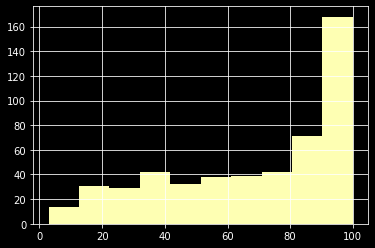

In [ ]:
### find the mean of AGE

#show columns 
housing_data.columns

#find mean of AGE 
mean = housing_data["AGE"].mean()
print(mean)

#find std dev of AGE
std_dev = housing_data["AGE"].std()
print(std_dev)

#show columns as a list 
col_list=list(housing_data.columns)
print(col_list)

housing_data["AGE"].hist()
plt.hist(housing_data.AGE) 
plt.show



In [ ]:
#the sample correlation between Age and Median Home Price?

from scipy.stats import pearsonr

pearsonr(housing_data['AGE'],housing_data['MEDV'])

(-0.37695456500459623, 1.5699822091877261e-18)

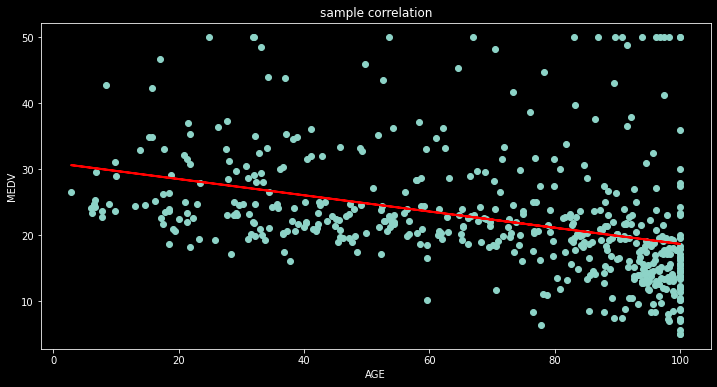

In [ ]:
#Perform a regression, predicting MEDV from AGE.

from sklearn.linear_model import LinearRegression
x=housing_data[["AGE"]]
y=housing_data["MEDV"]

# Initialise and fit model
lm = LinearRegression()
model = lm.fit(x, y)

# Build linear regression model 
sales_pred = model.predict(x)

# Plot regression against actual data
plt.figure(figsize=(12, 6))
plt.plot(housing_data['AGE'], housing_data['MEDV'], 'o')           # scatter plot showing actual data
plt.plot(housing_data['AGE'], sales_pred, 'r', linewidth=2)   # regression line
plt.xlabel('AGE')
plt.ylabel('MEDV')
plt.title('sample correlation')

plt.show()




In [ ]:
#Hypothesis- Houses next to The Charles River (CHAS) will have higher median price (MEDV or target) than those that are not.
#NullHypothesis- There is no statistical difference that houses next to The Charles River (CHAS) will have higher median price (MEDV or target) than those that are not.

In [ ]:
#calculate P-value with T-Test

from scipy import stats
a = housing_data["CHAS"] == 1
b = housing_data["CHAS"] == 0
stat, p = scipy.ttest_ind(housing_data[a]["MEDV"], housing_data[b]["MEDV"])
print(p)

#7.39e-5 = 7.39 x 10-5 = 0.0000739

7.390623170519905e-05


In [ ]:
#the 90% confidence interval for the target (price) of tracts that border the Charles River

scipy.t.interval(alpha = .1, df= len(housing_data[a]["MEDV"]) -1, loc = np.mean(housing_data[a]["MEDV"]), scale = scipy.sem(housing_data[a]["MEDV"]))

(28.18712508932039, 28.692874910679613)

In [ ]:
#group size is necessary for 80% power

from statsmodels.stats.power import tt_ind_solve_power

tt_ind_solve_power(effect_size=.6, nobs1=None, alpha=0.1, power=.8, ratio=1, alternative= 'two-sided')

35.042258702728816

In [ ]:
#create a column for Rec Center

from random import randint


np.random.seed(15)
housing_data['REC_CENT']=np.random.randint(0,400,housing_data.shape[0])/100
print(housing_data.head())

     CRIME    ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD  TAX  PTRATIO  \
0  0.00632  18.0   2.31     0  0.538  6.575  65.2  4.0900    1  296     15.3   
1  0.02731   0.0   7.07     0  0.469  6.421  78.9  4.9671    2  242     17.8   
2  0.02729   0.0   7.07     0  0.469  7.185  61.1  4.9671    2  242     17.8   
3  0.03237   0.0   2.18     0  0.458  6.998  45.8  6.0622    3  222     18.7   
4  0.06905   0.0   2.18     0  0.458  7.147  54.2  6.0622    3  222     18.7   

        B  LSTAT  MEDV  REC_CENT  
0  396.90   4.98  24.0      2.45  
1  396.90   9.14  21.6      3.96  
2  392.83   4.03  34.7      1.33  
3  394.63   2.94  33.4      3.75  
4  396.90   5.33  36.2      3.84  


In [ ]:
# find the New Median Value based on the distance of REC_CENT

housing_data['NEWMEDV']= np.where(housing_data["REC_CENT"]<= 1, housing_data["MEDV"]* (1+.13*.21**housing_data["REC_CENT"]), housing_data["MEDV"]) 

housing_data["IMPROVED"]=np.where(housing_data["REC_CENT"]<= 1, "Y", "N") 

print(housing_data["IMPROVED"].value_counts()["Y"])

113


In [ ]:
#calculate P-value with T-Test for REC CENTER

#from scipy import stats
#a = housing_data["REC_CENT"] == 1
#b = housing_data["REC_CENT"] == 0
#stat, p = scipy.ttest_ind(housing_data[a]["MEDV"], housing_data[b]["MEDV"])
#print(p)

Improved = housing_data[housing_data["IMPROVED"] == "Y"]
notimproved = housing_data[housing_data["IMPROVED"] == "N"]
scipy.ttest_ind(Improved["NEWMEDV"], notimproved["NEWMEDV"])


Ttest_indResult(statistic=1.48627312577913, pvalue=0.1378321528445305)